In [1]:
# Importing libraries
import pandas as pd

# Loading the data
df = pd.read_csv('salary.csv')

# Inspecting the data
df.head()
df.shape
df.info()
df.isnull().sum()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [2]:
# Checking how many '?' present in each column
for column in df.columns:
    print(f"{column}: {(df[column] == '?').sum()}")


age: 0
workclass: 0
fnlwgt: 0
education: 0
education-num: 0
marital-status: 0
occupation: 0
relationship: 0
race: 0
sex: 0
capital-gain: 0
capital-loss: 0
hours-per-week: 0
native-country: 0
salary: 0


In [5]:
from sklearn.preprocessing import LabelEncoder

# Encode all object (categorical) columns
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save the encoders for decoding later if needed


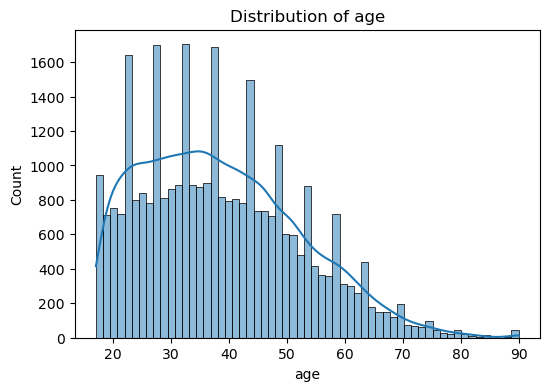

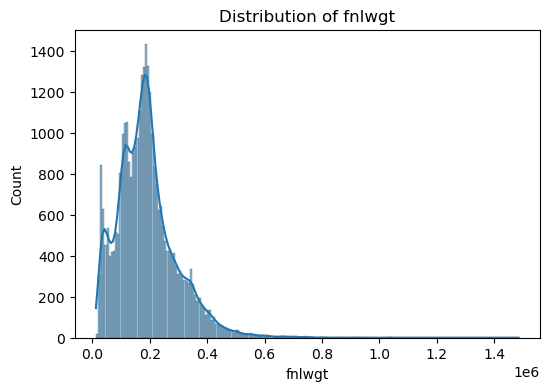

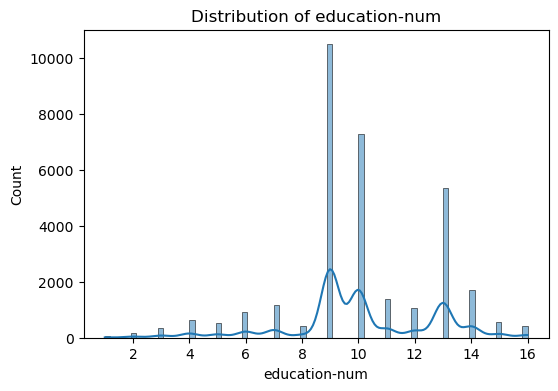

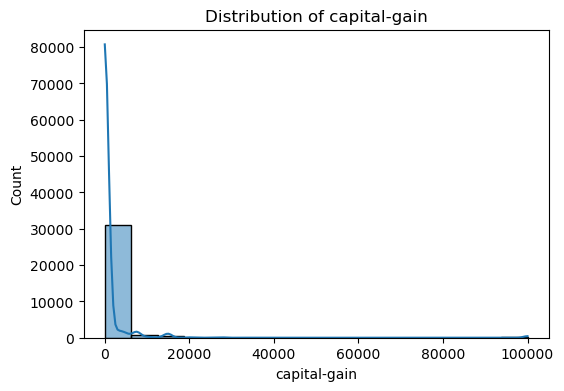

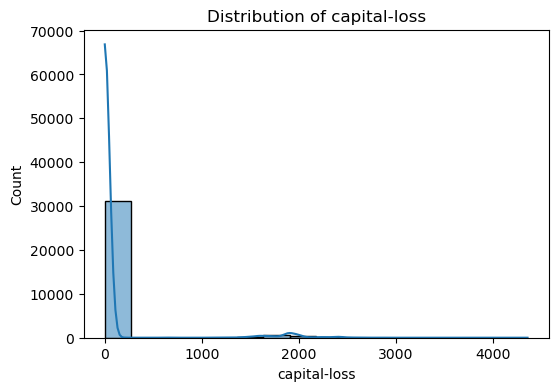

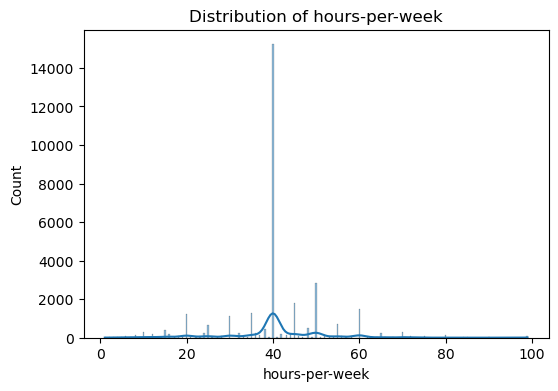

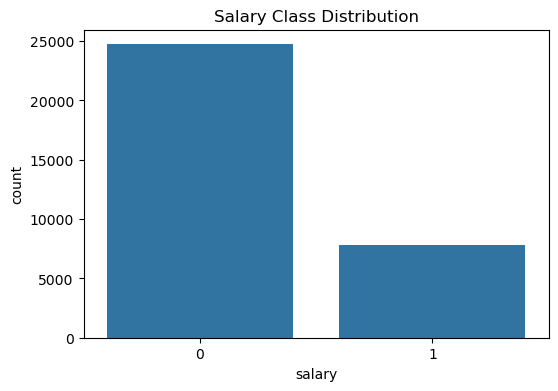

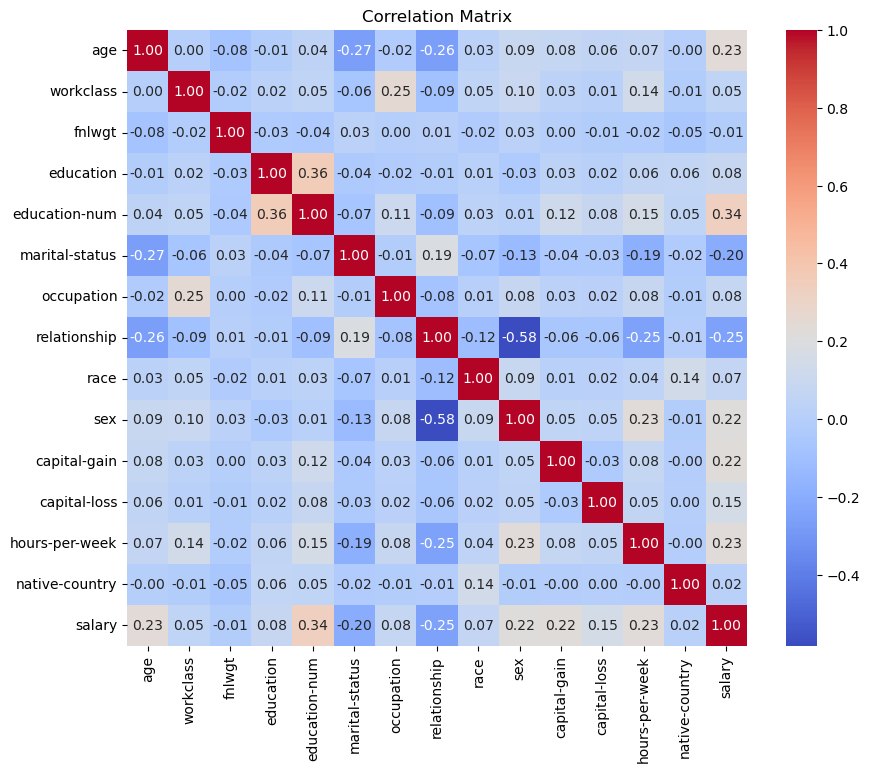

C:\Windows\Temp\ipykernel_18304\2584519287.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=cat, y='salary', data=df, ci=None)


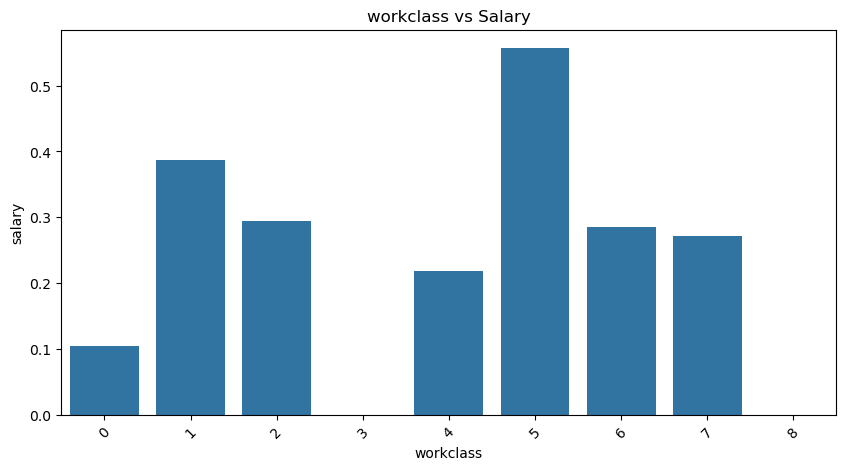

C:\Windows\Temp\ipykernel_18304\2584519287.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=cat, y='salary', data=df, ci=None)


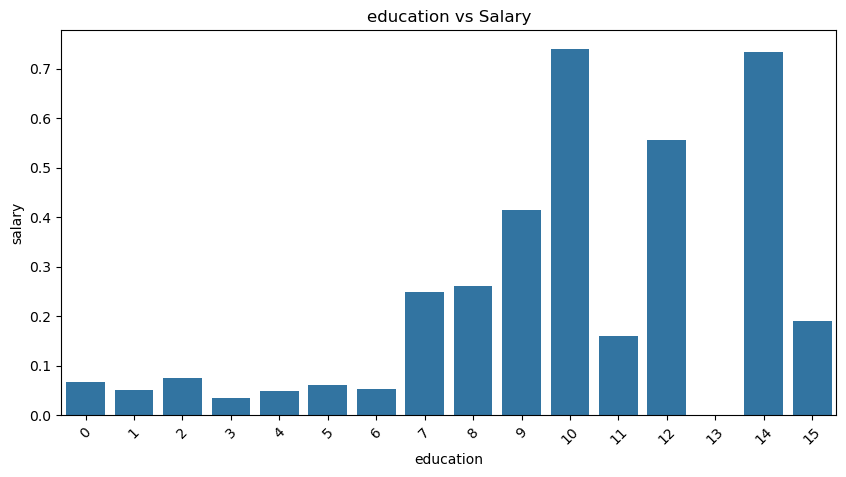

C:\Windows\Temp\ipykernel_18304\2584519287.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=cat, y='salary', data=df, ci=None)


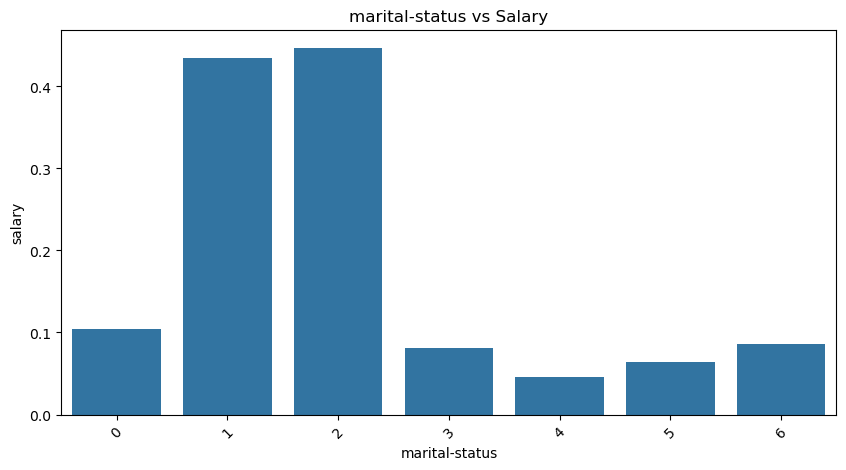

C:\Windows\Temp\ipykernel_18304\2584519287.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=cat, y='salary', data=df, ci=None)


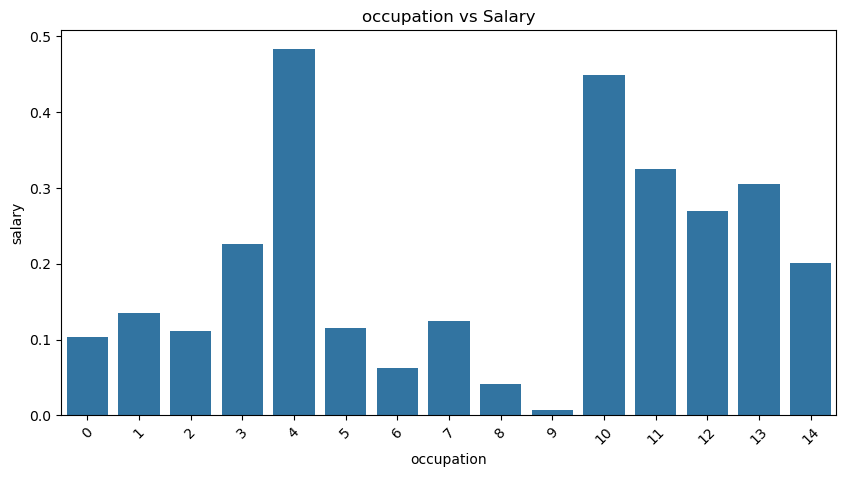

C:\Windows\Temp\ipykernel_18304\2584519287.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=cat, y='salary', data=df, ci=None)


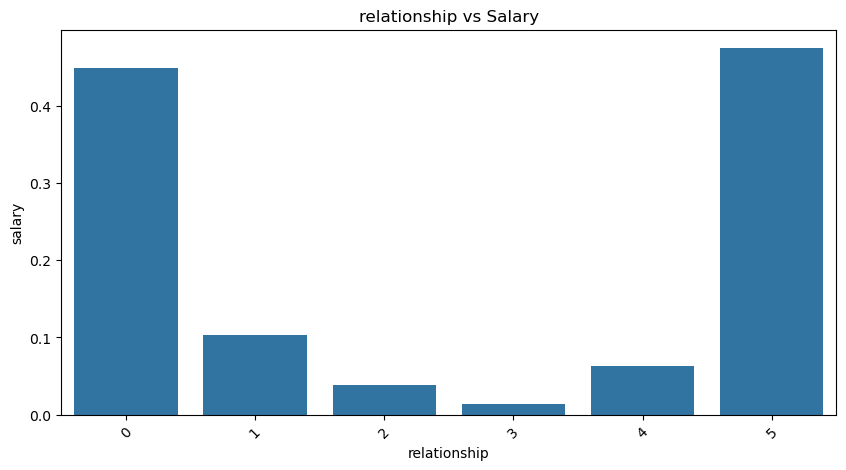

C:\Windows\Temp\ipykernel_18304\2584519287.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=cat, y='salary', data=df, ci=None)


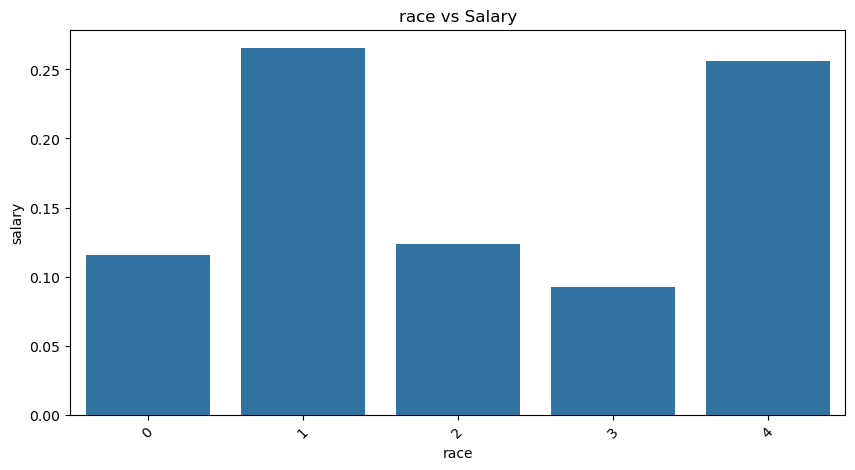

C:\Windows\Temp\ipykernel_18304\2584519287.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=cat, y='salary', data=df, ci=None)


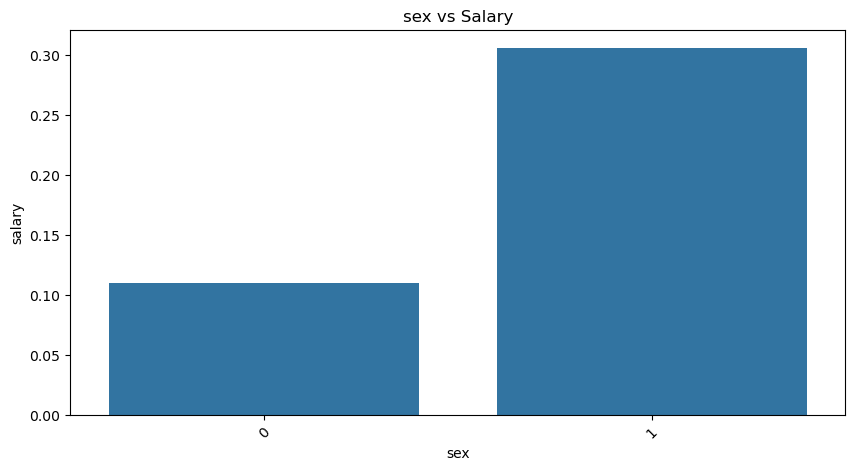

C:\Windows\Temp\ipykernel_18304\2584519287.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=cat, y='salary', data=df, ci=None)


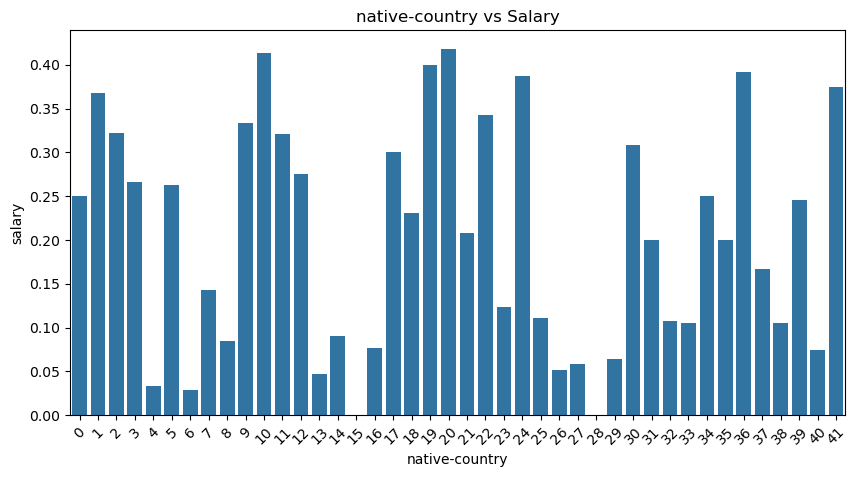

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 3.1 Distribution of numerical features
num_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

for feature in num_features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Distribution of target variable
plt.figure(figsize=(6,4))
sns.countplot(x='salary', data=df)
plt.title('Salary Class Distribution')
plt.show()

# 3.2 Correlation matrix
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 3.3 Relationship between categorical features and target
cat_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

for cat in cat_features:
    plt.figure(figsize=(10,5))
    sns.barplot(x=cat, y='salary', data=df, ci=None)
    plt.title(f'{cat} vs Salary')
    plt.xticks(rotation=45)
    plt.show()


In [7]:
# Example: dropping 'fnlwgt' if you deem it unnecessary
df = df.drop(['fnlwgt'], axis=1)


In [8]:
X = df.drop('salary', axis=1)
y = df['salary']


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [16]:
pip install xgboost lightgbm


Note: you may need to restart the kernel to use updated packages.


In [17]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [19]:
# Import models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# Advanced algorithms
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize models dictionary
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(kernel='rbf'),  # Or try kernel='linear'
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'MLP Neural Network': MLPClassifier(max_iter=300, hidden_layer_sizes=(100,), activation='relu'),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier()
}

# Train and evaluate each model
for name, model in models.items():
    print("="*40)
    print(f"Training Model: {name}")
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    # Evaluation
    print(f"{name} Accuracy: {accuracy_score(y_test, predictions):.4f}")
    print(classification_report(y_test, predictions))
    print(confusion_matrix(y_test, predictions))
    print("="*40)


Training Model: Logistic Regression


C:\Users\ntkr3\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.8245
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4942
           1       0.72      0.45      0.55      1571

    accuracy                           0.82      6513
   macro avg       0.78      0.70      0.72      6513
weighted avg       0.81      0.82      0.81      6513

[[4663  279]
 [ 864  707]]
Training Model: Decision Tree
Decision Tree Accuracy: 0.8185
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4942
           1       0.62      0.63      0.63      1571

    accuracy                           0.82      6513
   macro avg       0.75      0.75      0.75      6513
weighted avg       0.82      0.82      0.82      6513

[[4345  597]
 [ 585  986]]
Training Model: Random Forest
Random Forest Accuracy: 0.8524
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      4942
           1       0.72 

C:\Users\ntkr3\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:02:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


LightGBM Accuracy: 0.8787
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4942
           1       0.79      0.68      0.73      1571

    accuracy                           0.88      6513
   macro avg       0.85      0.81      0.83      6513
weighted avg       0.87      0.88      0.88      6513

[[4655  287]
 [ 503 1068]]


In [20]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 50, 100]
}

grid = GridSearchCV(
    estimator=LGBMClassifier(),
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

grid.fit(X_train, y_train)
print("Best parameters:", grid.best_params_)

# Evaluate best estimator
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print("Tuned LightGBM Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Fitting 3 folds for each of 81 candidates, totalling 243 fits
[LightGBM] [Info] Number of positive: 6270, number of negative: 19778
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000996 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 437
[LightGBM] [Info] Number of data points in the train set: 26048, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240709 -> initscore=-1.148794
[LightGBM] [Info] Start training from score -1.148794
Best parameters: {'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 100, 'num_leaves': 31}
Tuned LightGBM Accuracy: 0.8780899738983571
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4942
           1       0.79      0.68      0.73      1571

    accuracy                           0.88      6513
   macro avg       0.84 

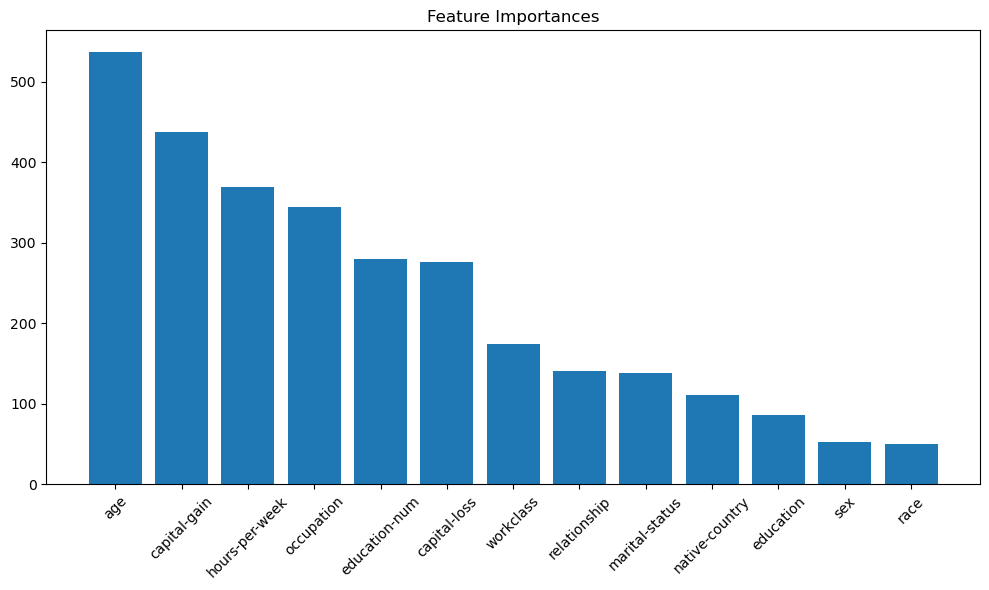

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature importances from the best model
importances = best_model.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()


In [24]:
import joblib
joblib.dump(best_model, 'salary_predictor.pkl')


['salary_predictor.pkl']

In [27]:
print("Expected Features:", list(X_train.columns))
print("Entered Features:", list(new_data.columns))


Expected Features: ['age', 'workclass', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']
Entered Features: ['age', 'education-num', 'workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']


In [28]:
import pandas as pd

new_data = pd.DataFrame({
    'age': [35, 40],
    'workclass': [4, 2],
    'education': [11, 13],            # <-- Add this line! (encoded values)
    'education-num': [10, 13],
    'marital-status': [0, 1],
    'occupation': [3, 5],
    'relationship': [1, 2],
    'race': [0, 1],
    'sex': [1, 0],
    'capital-gain': [0, 5000],
    'capital-loss': [0, 0],
    'hours-per-week': [40, 50],
    'native-country': [38, 2]
})


In [30]:
# Ensure column order and content matches X_train
new_data = new_data[X_train.columns]

# Predict using the trained model
predictions = model.predict(new_data)
print("Salary Class Predictions:", predictions)


Salary Class Predictions: [0 0]


In [33]:
# streamlit_app.py

import streamlit as st
import joblib
import pandas as pd

# Load model and encoders
model = joblib.load('salary_predictor.pkl')

st.title("Employee Salary Prediction App")

# Input features
age = st.number_input("Age", min_value=18, max_value=90, value=35)
education_num = st.selectbox("Education Level (encoded)", [10, 11, 12, 13, 14, 15, 16])
workclass = st.selectbox("Workclass (encoded)", [1, 2, 3, 4, 5])  # Encoded value
education = st.selectbox("Education (encoded)", [11, 12, 13])     # Add options based on your label encoding
marital_status = st.selectbox("Marital Status (encoded)", [0, 1])
occupation = st.selectbox("Occupation (encoded)", [3, 5, 6])
relationship = st.selectbox("Relationship (encoded)", [0, 1, 2])
race = st.selectbox("Race (encoded)", [0, 1])
sex = st.selectbox("Sex", [0, 1])
capital_gain = st.number_input("Capital Gain", 0, 100000)
capital_loss = st.number_input("Capital Loss", 0, 5000)
hours_per_week = st.number_input("Hours/Week", 1, 100, 40)
native_country = st.selectbox("Native Country (encoded)", [2, 10, 20, 38])

# Prediction
if st.button("Predict Salary Class"):
    input_data = pd.DataFrame([[
        age, workclass, education, education_num, marital_status, occupation,
        relationship, race, sex, capital_gain, capital_loss, hours_per_week, native_country
    ]], columns=model.feature_name_)

    prediction = model.predict(input_data)[0]
    
    label = "≤50K" if prediction == 0 else ">50K"
    st.success(f"Predicted Salary Class: {label}")


2025-07-22 22:37:18.672 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-22 22:37:18.805 
  command:

    streamlit run C:\Users\ntkr3\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-07-22 22:37:18.806 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-22 22:37:18.807 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-22 22:37:18.807 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-22 22:37:18.808 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-22 22:37:18.808 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-22 22:37:18.808 Session state does not 

In [34]:
streamlit run streamlit_app.py


SyntaxError: invalid syntax (2482160671.py, line 1)